## Adapted from:

*Python Machine Learning 3rd Edition* by [Sebastian Raschka](https://sebastianraschka.com), Packt Publishing Ltd. 2019

Code Repository: https://github.com/rasbt/python-machine-learning-book-3rd-edition

Code License: [MIT License](https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/LICENSE.txt)

# Support Vector Machine (SVM)

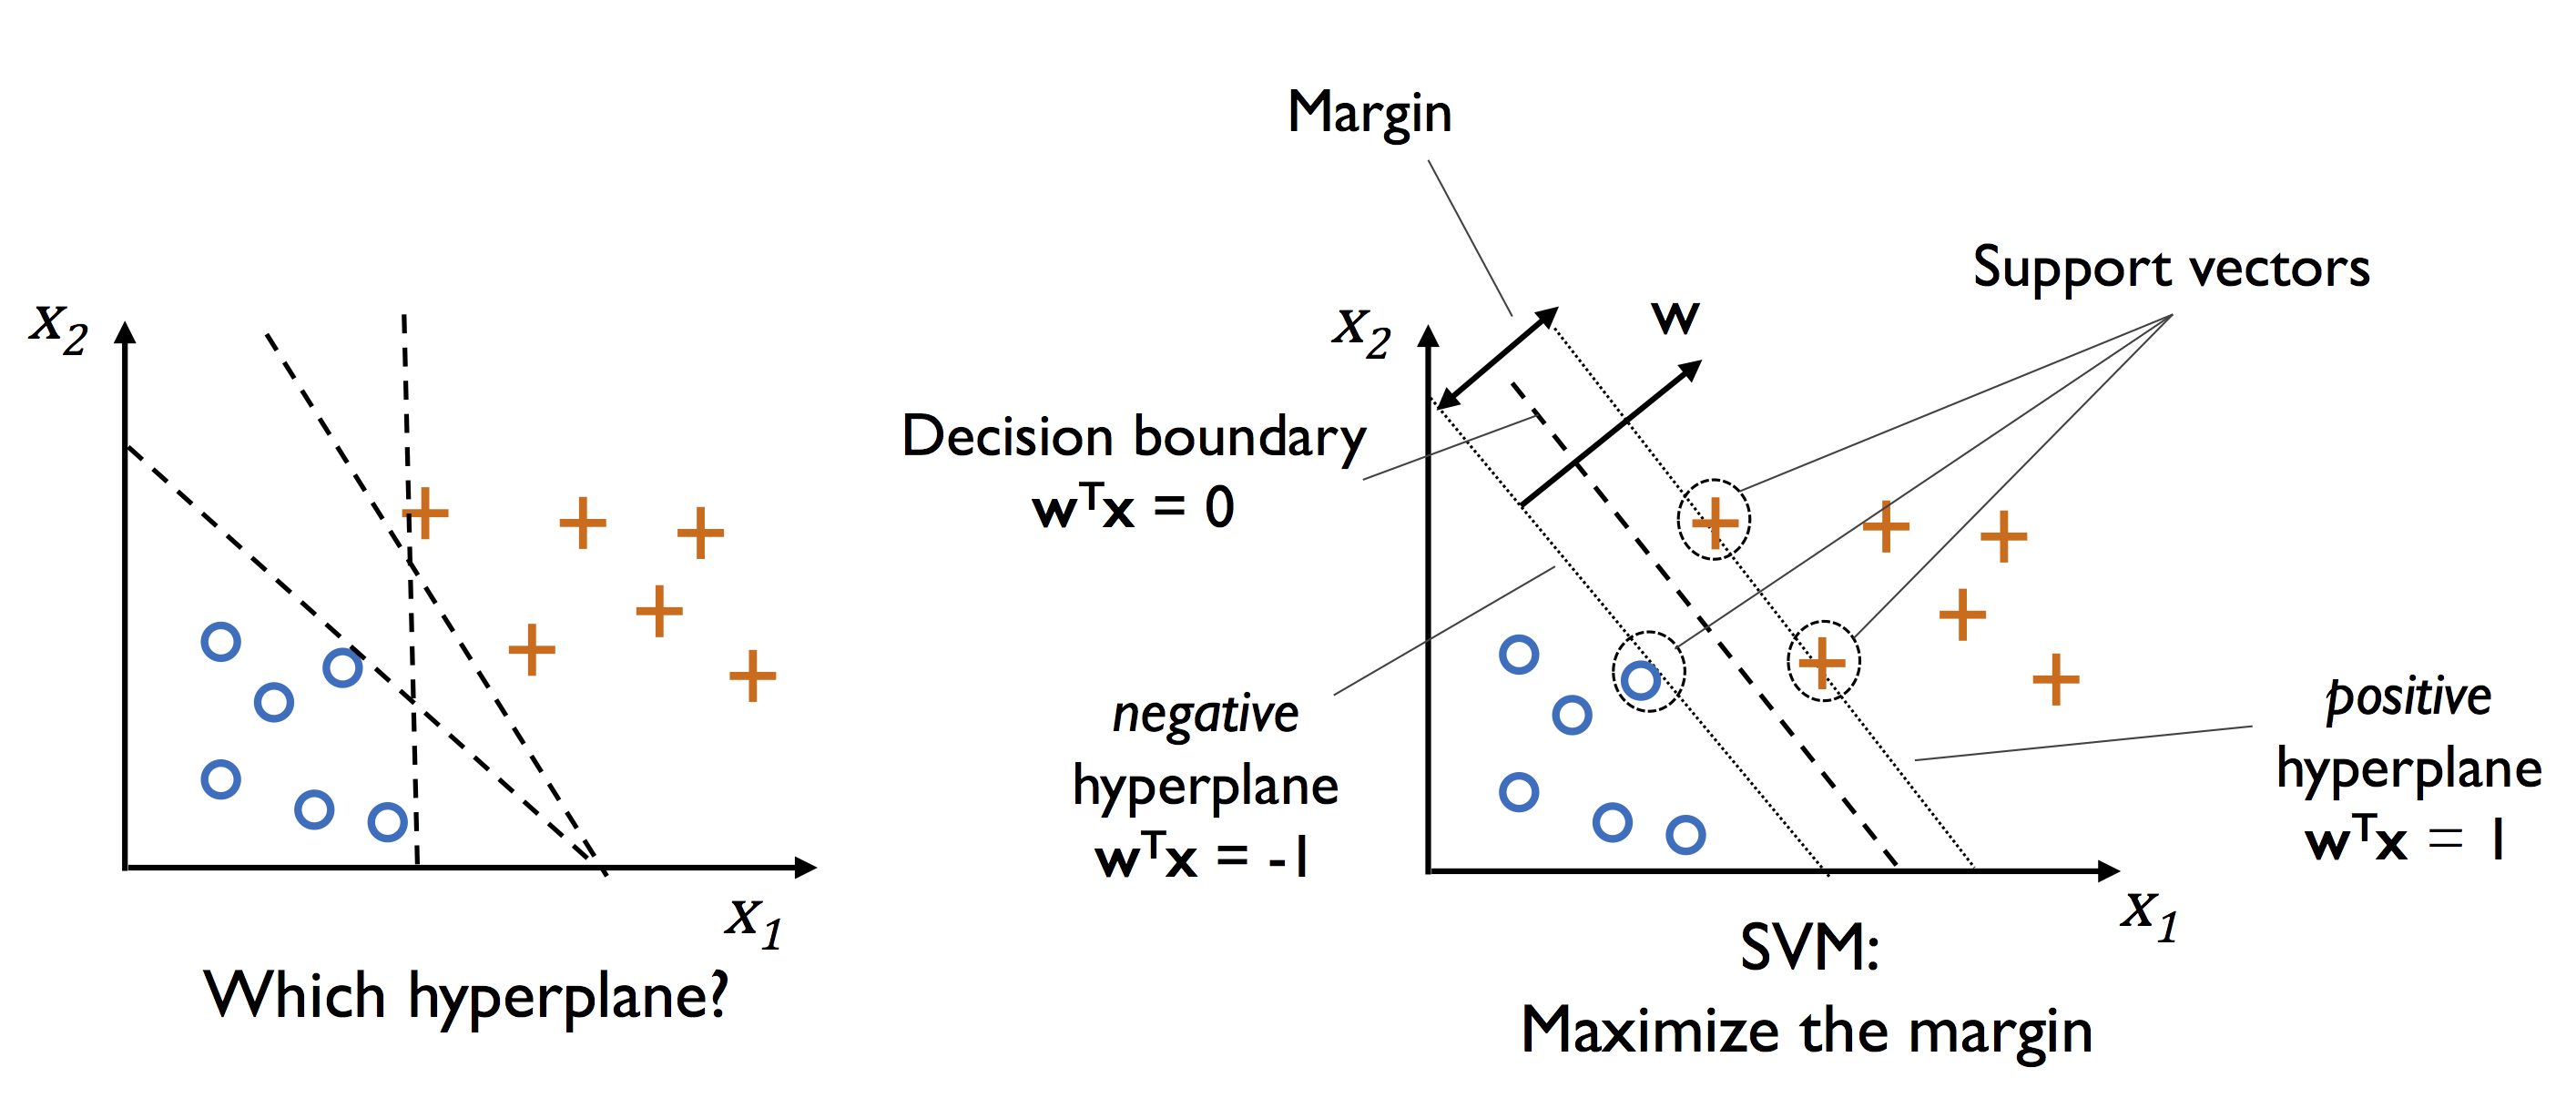

In [1]:
from IPython.display import Image
%matplotlib inline

Image(filename='images/03_09.png', width=500) 

In [2]:
# define plot_decision_regions for later use

In [3]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

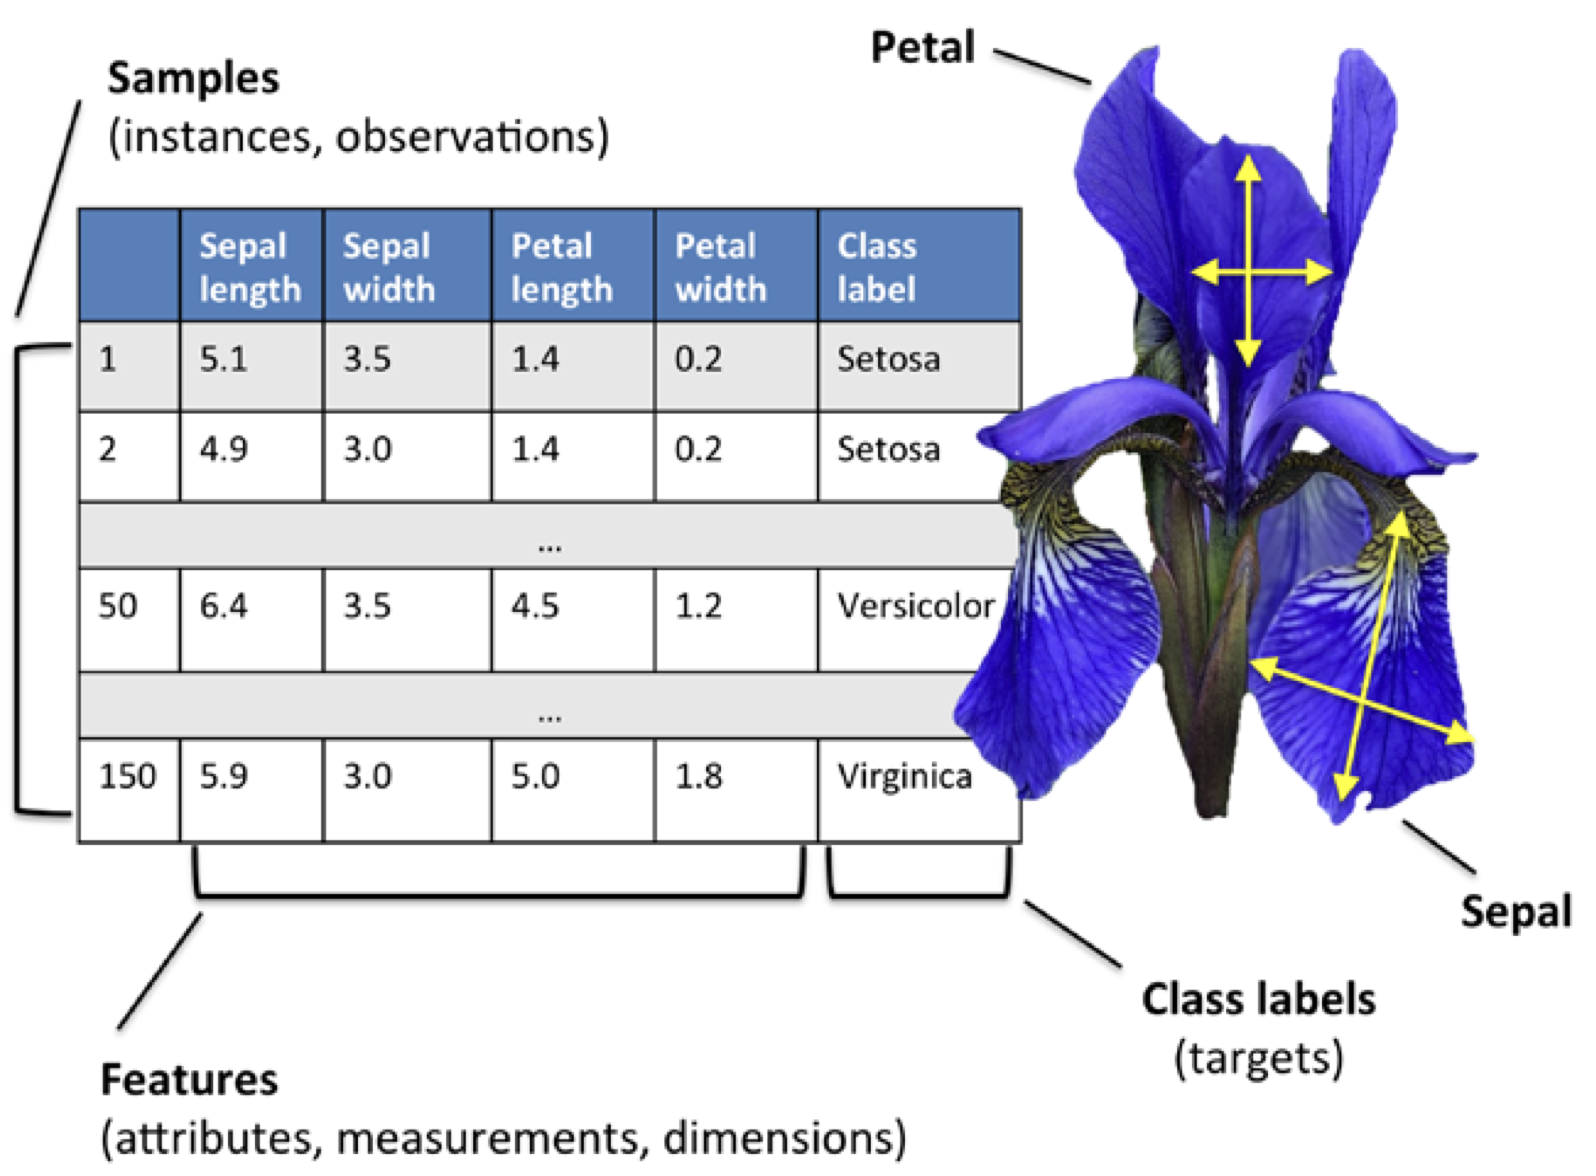

# Load the Iris dataset

In [4]:
import numpy as np
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

iris = pd.read_csv(s, header=None)
iris

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Steps to build ML model in sklean

In [5]:
# 1. Arrange the data into featues and target arrays.

In [6]:
# extract petal length and petal width
X = iris.iloc[:,0:4]
y = iris.iloc[:,4]

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [7]:
# change y from categorical to numeric
y = pd.factorize(iris[4])[0]
print(y.shape)
print(y)
print(X)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


In [8]:
# 2. Split data into a training set and test set
#    Splitting data into 70% training and 30% test data:

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [10]:
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

print(X_train.shape)
print(X_test.shape)
print(X_train)

Labels count in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]
(105, 4)
(45, 4)
       0    1    2    3
33   5.5  4.2  1.4  0.2
20   5.4  3.4  1.7  0.2
115  6.4  3.2  5.3  2.3
124  6.7  3.3  5.7  2.1
35   5.0  3.2  1.2  0.2
..   ...  ...  ...  ...
41   4.5  2.3  1.3  0.3
92   5.8  2.6  4.0  1.2
26   5.0  3.4  1.6  0.4
3    4.6  3.1  1.5  0.2
42   4.4  3.2  1.3  0.2

[105 rows x 4 columns]


In [11]:
# Standardize the features (why did we not do this in preprocessing)

In [12]:
# z = (x - u) / s

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(X_train_std.shape)
print(X_test_std.shape)

(105, 4)
(45, 4)


## SVC(kernel="linear") -- Baseline with all features

In [13]:
# 3. Select the ML algorithm, and its parameteters

In [14]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')

In [15]:
# 4. Build the model (.fit)

In [16]:
svm.fit(X_train_std, y_train)

SVC(kernel='linear')

In [17]:
# 5. Apply the model to the test data (.predict)
# 6. Estimate performance (accuracy score)

In [18]:
from sklearn import metrics 
y_pred = svm.predict(X_test_std)
print(metrics.accuracy_score(y_test, y_pred))

0.9777777777777777


## SVC(kernel="rbf") rbf = radial basis function -- Baseline with all features

In [19]:
svm = SVC(kernel='rbf')
# try gamma = .2 and 100
svm.fit(X_train_std, y_train)

SVC()

In [20]:
from sklearn import metrics 
y_pred = svm.predict(X_test_std)
print(metrics.accuracy_score(y_test, y_pred))

0.9777777777777777


## SVC(kernel="linear") -- Baseline with 2 features

In [21]:
# 1. Arrange the data into featues and target arrays.

In [22]:
# extract petal length and petal width
X = iris.iloc[:,[2, 3]]
y = iris.iloc[:,4]

print(X.shape)
print(y.shape)

(150, 2)
(150,)


In [23]:
# change y from categorical to numeric
y = pd.factorize(iris[4])[0]
print(y.shape)
print(y)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [24]:
# 2. Split data into a training set and test set
#    Splitting data into 70% training and 30% test data:

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [26]:
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

print(X_train.shape)
print(X_test.shape)
print(X_train)

Labels count in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]
(105, 2)
(45, 2)
       2    3
33   1.4  0.2
20   1.7  0.2
115  5.3  2.3
124  5.7  2.1
35   1.2  0.2
..   ...  ...
41   1.3  0.3
92   4.0  1.2
26   1.6  0.4
3    1.5  0.2
42   1.3  0.2

[105 rows x 2 columns]


In [27]:
# Standardize the features (why did we not do this in preprocessing)

In [28]:
# z = (x - u) / s

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(X_train_std.shape)
print(X_test_std.shape)

(105, 2)
(45, 2)


In [29]:
# 3. Select the ML algorithm, and its parameteters

In [30]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')

In [31]:
# 4. Build the model (.fit)

/tmp/ipykernel_722/2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/tmp/ipykernel_722/2412832179.py:42: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


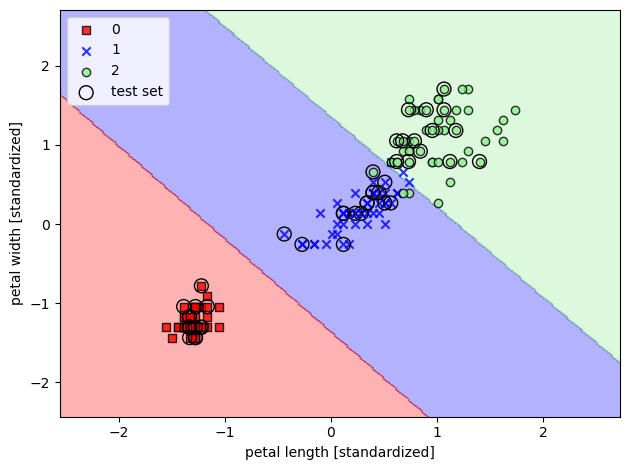

In [32]:
svm.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_24.png', dpi=300)
plt.show()

In [33]:
# 5. Apply the model to the test data (.predict)
# 6. Estimate performance (accuracy score)

In [34]:
from sklearn import metrics 
y_pred = svm.predict(X_test_std)
print(metrics.accuracy_score(y_test, y_pred))

0.9777777777777777


## SVC(kernel="rbf") rbf = radial basis function -- Baseline with 2 features and low gamma

In [35]:
# 3. Select the ML algorithm, and its parameteters

In [36]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)

In [37]:
# 4. Build the model (.fit)

/tmp/ipykernel_722/2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/tmp/ipykernel_722/2412832179.py:42: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


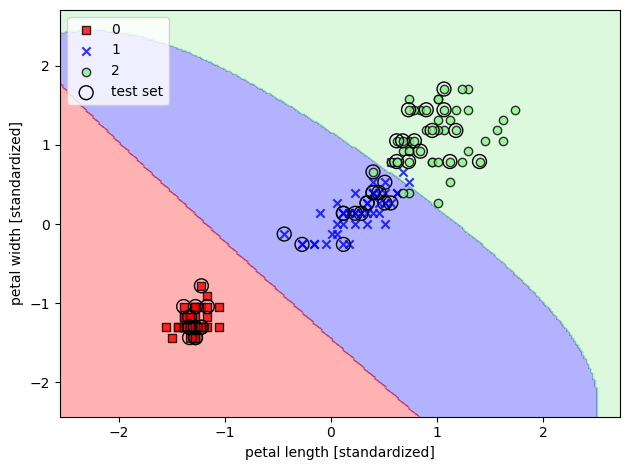

In [38]:
svm.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_24.png', dpi=300)
plt.show()

## SVC(kernel="rbf") rbf = radial basis function -- Baseline with 2 features and high gamma

In [39]:
# 3. Select the ML algorithm, and its parameteters

In [40]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=100, C=1.0)

In [41]:
# 4. Build the model (.fit)

/tmp/ipykernel_722/2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/tmp/ipykernel_722/2412832179.py:42: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


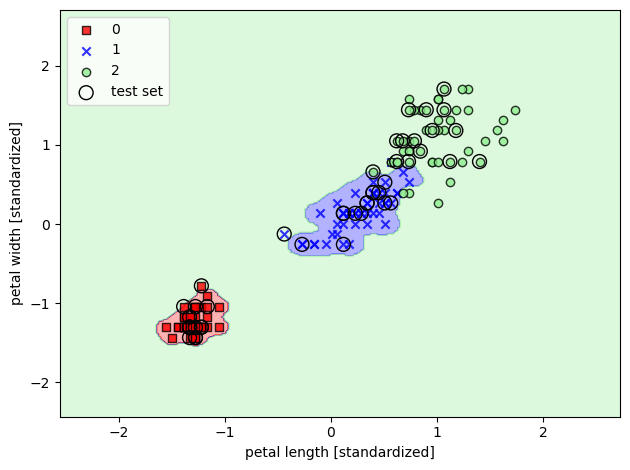

In [42]:
svm.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_24.png', dpi=300)
plt.show()